# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
Data=pd.read_csv("../assets/billboard.csv")
Data.shape

(317, 83)

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data has  317 rows and 83 columns a lot of which has little data, however as they have been filled in with NaNs, the can still be used effectivly. The column 'Year' does not contribute to anything. There is a mix of datetime, integer/float and string data types.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [3]:
#Initially Renaming a number of columns for clarity
Data = Data.rename(columns={'artist.inverted': 'artist', 'date.entered': 'date_entered','date.peaked':'date_peaked'})
Data.head(2)

,year,artist,track,time,genre,date_entered,date_peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#The Year Column can be dropped
Data=Data.drop('year',axis=1)

In [5]:
#Converting the date columns to datetime types
Data['date_entered']=pd.to_datetime(Data['date_entered'])
Data['date_peaked']=pd.to_datetime(Data['date_peaked'])

In [6]:
#Creating a new columne that is the track length in seconds as an integer
Data['Time_In_Seconds']='0:'+Data['time']
Data['Time_In_Seconds']=pd.to_timedelta(Data['Time_In_Seconds'])
Data['Time_In_Seconds']=Data['Time_In_Seconds'].dt.total_seconds()

In [7]:
#Create a new column which is equal to the number of weeks it took for each track to peak.
Data['Time_to_Peak']=Data['date_peaked']-Data['date_entered']
Data['Time_to_Peak']=(Data['Time_to_Peak']/np.timedelta64(1, 'D')).astype(int)
Data.head(2)

,artist,track,time,genre,date_entered,date_peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,Time_In_Seconds,Time_to_Peak
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.0,56
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,56


In [8]:
#Creating which displays the value of the highest rank each track achieved
Data['Highest_Rank']=Data.loc[:,'x1st.week':'x76th.week'].min(numeric_only=True, axis = 1)
Data.to_csv("Total_Data.csv")

In [9]:
#Creating a new DataFrame of the number of tracks by each artist.
Artist_Number_Of_Tracks=pd.DataFrame(Data['artist'].value_counts())
Artist_Number_Of_Tracks=Artist_Number_Of_Tracks.rename(columns={'artist':'Number_of_Tracks'})
Artist_Number_Of_Tracks.head(2)

,Number_of_Tracks
Jay-Z,5
"Houston, Whitney",4


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [10]:
#Renaming all of the week headers in order to output a csv file that can be used by Tableau
#with the headers as xaxis number of weeks value.
Week_Headers=list(Data.loc[:,'x1st.week':'x76th.week'].columns)
Column_Name_Dict={}
for x in range(len(Week_Headers)):
    Column_Name_Dict[Week_Headers[x]]=x+1
Data_With_Int_Column_Names=Data.rename(columns=Column_Name_Dict)

In [11]:
#Using the Data melt function to create a long list of each track, the artist and the position in the 
#chart it appeared for each week, the weeks in which a track did not appear are dropped.
Data_Melt=pd.melt(Data_With_Int_Column_Names,id_vars=['artist','track','genre'], value_vars=range(76))
Data_Melt_Dropped=Data_Melt.dropna()
Data_Melt_Dropped.head(2)

,artist,track,genre,variable,value
317,Destiny's Child,Independent Women Part I,Rock,1,78.0
318,Santana,"Maria, Maria",Rock,1,15.0


In [12]:
#Renaming the headers of this new DataFrame and outputting it to csv for use with Tableau
Data_Melt_Dropped=Data_Melt_Dropped.rename(columns={'variable':'Week','value':'Chart_Position'})
Data_Melt_Dropped.to_csv("Test.csv")
Data_Melt_Dropped.head(2)

,artist,track,genre,Week,Chart_Position
317,Destiny's Child,Independent Women Part I,Rock,1,78.0
318,Santana,"Maria, Maria",Rock,1,15.0


In [13]:
#Counting the number of weeks each track appeared in the charts and creating a new DataFrame with these values.
Track_Wks_In_Chart=pd.pivot_table(Data_Melt_Dropped,index='track',values='Week',
                                               aggfunc=np.max)
Track_Dict={'track':list(Track_Wks_In_Chart.index),'Weeks In Chart':list(Track_Wks_In_Chart)}
Track_Wks_In_Chart=pd.DataFrame(Track_Dict)
Track_Wks_In_Chart.head(2)

,Weeks In Chart,track
0,34,(Hot S**t) Country Grammar
1,9,3 Little Words


In [14]:
#Merging the DataFrame with the values generated above with the main DataFrame.
Data=Data.merge(Track_Wks_In_Chart,on='track')
Data.head(2)

,artist,track,time,genre,date_entered,date_peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,Time_In_Seconds,Time_to_Peak,Highest_Rank,Weeks In Chart
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,218.0,56,1.0,28
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,258.0,56,1.0,26


In [15]:
#Creating a Dataframe with the artists and the total number of weeks each Artist was in the charts.
Artist_Weeks_In_Chart=pd.pivot_table(Data_Melt_Dropped, index=['artist'],
                                     values='Week', aggfunc='count')
Artist_Weeks_In_Chart=pd.DataFrame(Artist_Weeks_In_Chart)
Artist_Weeks_In_Chart=Artist_Weeks_In_Chart.rename(columns={'Week':'Total_weeks_in_Charts'})
Artist_Weeks_In_Chart.head()

,Total_weeks_in_Charts
artist,
2 Pac,7
2Ge+her,3
3 Doors Down,73
504 Boyz,18
98�,20


In [16]:
#Creating a DataFrame with summary data for each artist - Track Time, Time to Peak, Number of Tracks, 
#Total Weeks in Chart
Artist_Pivot=pd.pivot_table(Data,index=['artist'],values=['Time_In_Seconds','Time_to_Peak'])
Artist_Pivot=Artist_Pivot.join([Artist_Number_Of_Tracks,Artist_Weeks_In_Chart])
Artist_Pivot.head()

,Time_In_Seconds,Time_to_Peak,Number_of_Tracks,Total_weeks_in_Charts
artist,,,,
2 Pac,262.0,14.0,1,7
2Ge+her,195.0,7.0,1,3
3 Doors Down,248.5,129.5,2,73
504 Boyz,215.0,21.0,1,18
98�,204.0,42.0,1,20


In [17]:
#Creating a Dataframe with the Genres and the total number of weeks each Genre in the charts.
Genre_Total_Weeks_In_Chart=pd.pivot_table(Data_Melt_Dropped, index=['genre'],
                                          values='Week', aggfunc='count',margins=True)
Genre_Total_Weeks_In_Chart=pd.DataFrame(Genre_Total_Weeks_In_Chart)
Genre_Total_Weeks_In_Chart=Genre_Total_Weeks_In_Chart.rename(columns={'Week':'Total_Weeks_In_Chart'})
Genre_Total_Weeks_In_Chart

,Total_Weeks_In_Chart
genre,
Country,1200.0
Electronica,72.0
Gospel,20.0
Jazz,5.0
Latin,173.0
Pop,137.0
R&B,261.0
Rap,837.0
Reggae,15.0


In [18]:
#Creating a Dataframe with the Genres and the total number of tracks for each Genre.
Genre_Number_Of_Tracks=pd.DataFrame(Data['genre'].value_counts())
Genre_Number_Of_Tracks=Genre_Number_Of_Tracks.rename(columns={'genre':'Number_of_Tracks'})
Genre_Number_Of_Tracks

,Number_of_Tracks
Rock,137
Country,74
Rap,58
R&B,23
Pop,9
Latin,9
Electronica,4
Gospel,1
Jazz,1
Reggae,1


In [19]:
#Creating a DataFrame with summary data for each Genre -Averages of Track Time and Time to Peak, count of 
#Number of Tracks and Total Weeks in Chart. Calculate the average length of time a track from each Genre stays 
#in the Charts.
Genre_Pivot=pd.pivot_table(Data,index=['genre'],values=['Time_In_Seconds','Time_to_Peak','Highest_Rank'])
Genre_Pivot=Genre_Pivot.join([Genre_Number_Of_Tracks,Genre_Total_Weeks_In_Chart])
Genre_Pivot['Avg_Track_Period_In_Chart']=Genre_Pivot['Total_Weeks_In_Chart']/Genre_Pivot['Number_of_Tracks']
Genre_Pivot['Proportion_of_Total_Tracks']=Genre_Pivot['Number_of_Tracks']/317
Genre_Pivot

,Highest_Rank,Time_In_Seconds,Time_to_Peak,Number_of_Tracks,Total_Weeks_In_Chart,Avg_Track_Period_In_Chart,Proportion_of_Total_Tracks
genre,,,,,,,
Country,49.554054,226.689189,58.364865,74,1200.0,16.216216,0.233438
Electronica,49.250000,270.750000,61.250000,4,72.0,18.000000,0.012618
Gospel,57.000000,330.000000,56.000000,1,20.0,20.000000,0.003155
Jazz,7.000000,470.000000,14.000000,1,5.0,5.000000,0.003155
Latin,31.444444,254.444444,64.555556,9,173.0,19.222222,0.028391
Pop,42.111111,225.000000,47.444444,9,137.0,15.222222,0.028391
R&B,59.304348,242.956522,28.608696,23,261.0,11.347826,0.072555
Rap,52.362069,243.396552,41.396552,58,837.0,14.431034,0.182965
Reggae,54.000000,257.000000,42.000000,1,15.0,15.000000,0.003155


In [20]:
#Display Summary Statistics for each Genre
Genre_Pivot.describe()

,Highest_Rank,Time_In_Seconds,Time_to_Peak,Number_of_Tracks,Total_Weeks_In_Chart,Avg_Track_Period_In_Chart,Proportion_of_Total_Tracks
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43.809902,276.778415,47.069310,31.700000,530.700000,15.332273,0.100000
std,15.720628,74.084115,16.009281,45.055645,825.924808,4.484456,0.142131
min,7.000000,225.000000,14.000000,1.000000,5.000000,5.000000,0.003155
25%,37.582522,243.066529,41.547414,1.750000,33.000000,14.573276,0.005521
50%,49.402027,250.995945,51.722222,9.000000,155.000000,15.719219,0.028391
75%,53.590517,267.312500,58.041897,49.250000,693.000000,18.662409,0.155363
max,59.304348,470.000000,64.555556,137.000000,2587.000000,20.000000,0.432177


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

I would like to examine what makes a sucessful track, by answering the following questions


## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

What Genre should I choose?.
How long should the track be?
What time of year should I release the track?
Will I be more successful if I have already released a track in this calendar year?
How long do I need to be in the charts for me to have a higher chance of getting a higher rank?

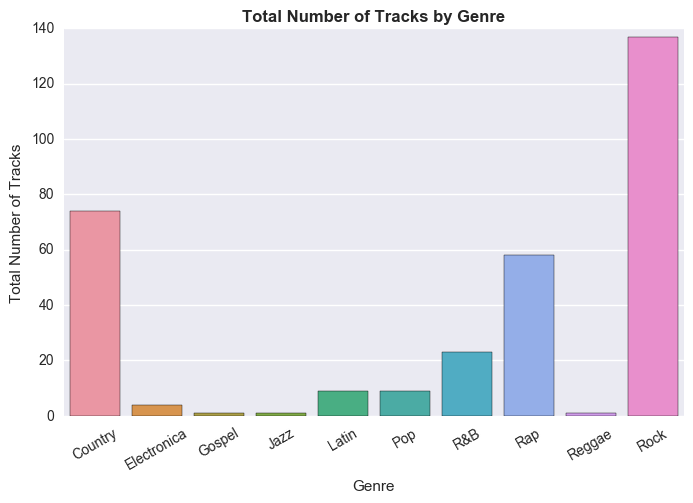

In [21]:
#Total Number of Tracks by Genre SubPlot
fig1=plt.figure(figsize=(8,5))
ax3=fig1.add_subplot(111)
sns.barplot(x=Genre_Pivot.index,y=Genre_Pivot['Number_of_Tracks'],ax=ax3)
ax3.set_xticklabels(Genre_Pivot.index,rotation=30)
ax3.set_xlabel('Genre')
ax3.set_ylabel('Total Number of Tracks')
ax3.set_title('Total Number of Tracks by Genre',fontweight='bold')
fig1.savefig('NofTbyGen.png')

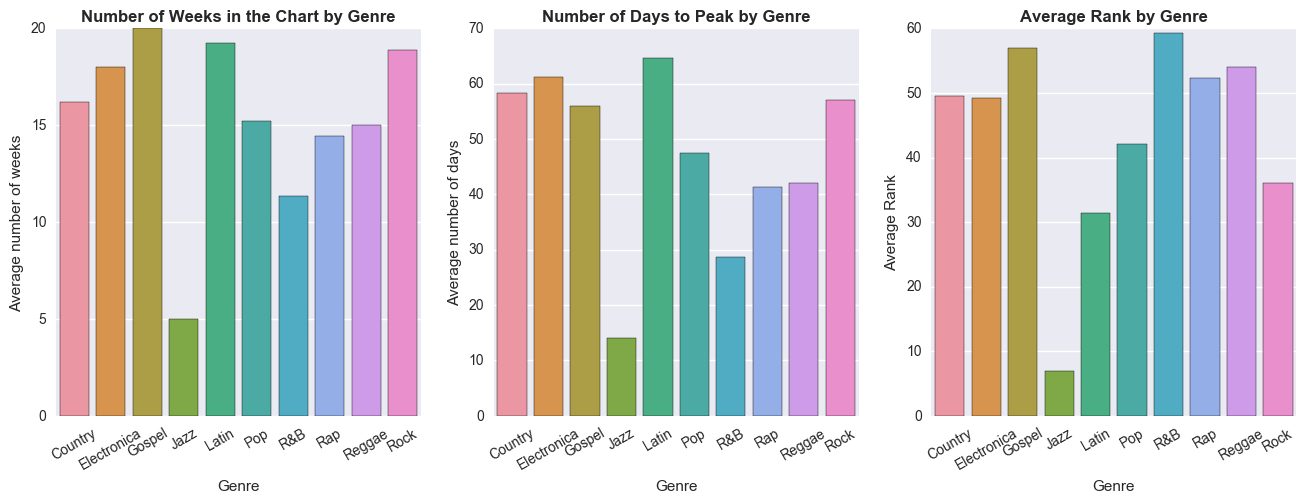

In [22]:
fig2=plt.figure(figsize=(16,5))

#Average Number of Days a Track Stays in the Chart by Genre Subplot
ax4=fig2.add_subplot(131)
sns.barplot(x=Genre_Pivot.index,y=Genre_Pivot['Avg_Track_Period_In_Chart'],ax=ax4)
ax4.set_xticklabels(Genre_Pivot.index,rotation=30)
ax4.set_xlabel('Genre')
ax4.set_ylabel('Average number of weeks')
ax4.set_title('Number of Weeks in the Chart by Genre',fontweight='bold')

#Average Number of Days for a Track to Peak - by Genre Sub Plot
ax5=fig2.add_subplot(132)
sns.barplot(x=Genre_Pivot.index,y=Genre_Pivot['Time_to_Peak'],ax=ax5)
ax5.set_xticklabels(Genre_Pivot.index,rotation=30)
ax5.set_xlabel('Genre')
ax5.set_ylabel('Average number of days')
ax5.set_title('Number of Days to Peak by Genre',fontweight='bold')
fig1.savefig('Genre_Subplots.png')

#Average Rank achieved by each Genre
ax13=fig2.add_subplot(133)
sns.barplot(x=Genre_Pivot.index,y=Genre_Pivot['Highest_Rank'],ax=ax13)
ax13.set_xticklabels(Genre_Pivot.index,rotation=30)
ax13.set_xlabel('Genre')
ax13.set_ylabel('Average Rank')
ax13.set_title('Average Rank by Genre',fontweight='bold')
fig2.savefig('Genre_Subplots.png')

242.42586750788644

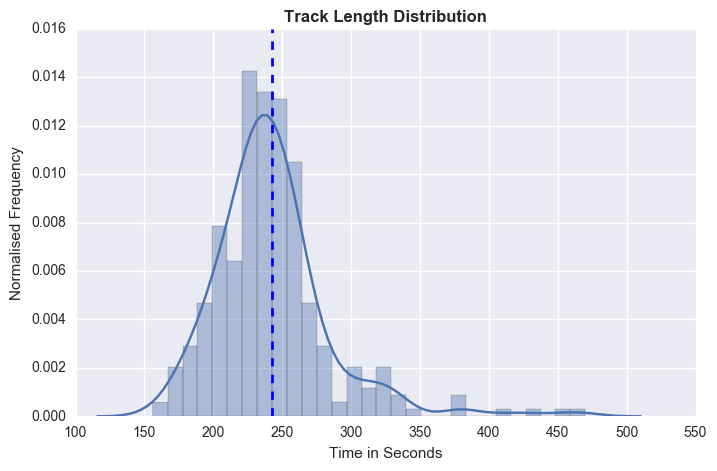

In [23]:
fig3=plt.figure(figsize=(8,5))

#Track Length Distribution Sub Plot
ax1=fig3.add_subplot(111)
sns.distplot(Data['Time_In_Seconds'],ax=ax1)
ax1.set_title('Track Length Distribution',fontweight='bold')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Normalised Frequency')
ax1.axvline(Data['Time_In_Seconds'].mean(), color='b', linestyle='dashed', linewidth=2)
fig3.savefig('TrackLengthHit.png')
Data['Time_In_Seconds'].mean()

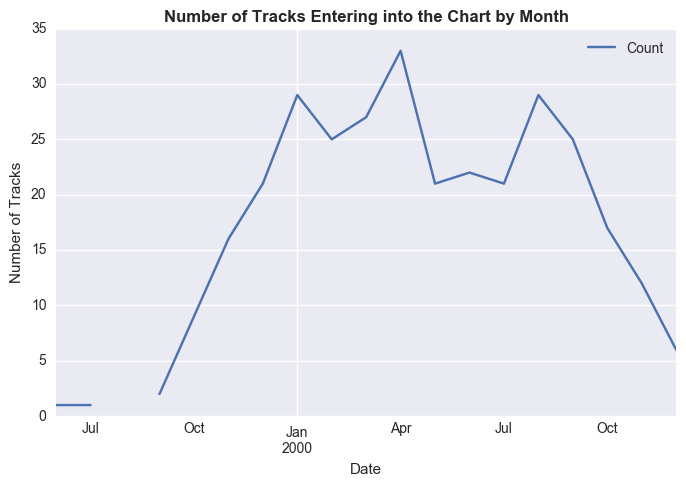

In [24]:
fig4=plt.figure(figsize=(8,5))

#Datetime Number of Tracks Sub Plot
ax2=fig4.add_subplot(111)
Date_Df=pd.DataFrame(index=Data['date_entered'])
Date_Df['Count']=1
Date_Df.resample('M').sum().plot(ax=ax2)
ax2.set_title('Number of Tracks Entering into the Chart by Month',fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Tracks')
fig4.savefig('NTrkPerM.png')

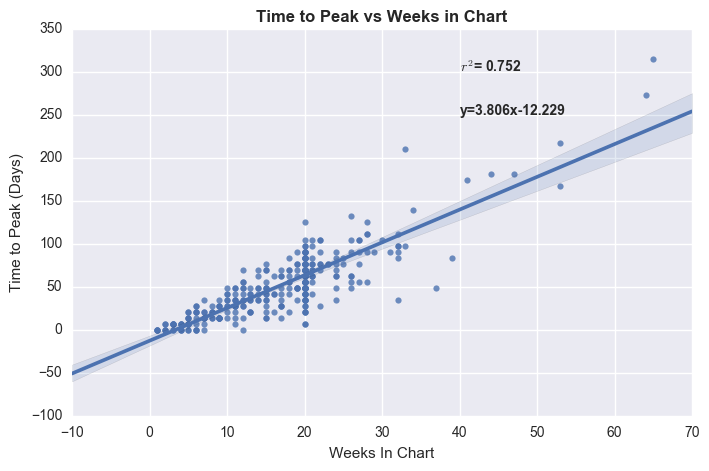

In [25]:
fig5=plt.figure(figsize=(8,5))
slope, intercept, r_value, p_value, std_err = stats.linregress(Data['Weeks In Chart'],Data['Time_to_Peak'])
ax7=fig5.add_subplot(111)
ax7=sns.regplot(Data['Weeks In Chart'],Data['Time_to_Peak'])
ax7.set_ylabel('Time to Peak (Days)')
ax7.set_title('Time to Peak vs Weeks in Chart',fontweight='bold')
s='$r^2$= '+str(round(r_value**2,3))
s2='y=%sx%s'%(round(slope,3),round(intercept,3))
ax7.text(40,300,s,fontweight='bold')
ax7.text(40,250,s2,fontweight='bold')
fig5.savefig('TtoPkvsWkCht.png')

In [26]:
#A sorted Dataframe, based on the date entered is created to find out which tracks were the artists 1st,2nd
# 3rd ..etc. of the year.
Sorted_Data=Data.sort_values(by='date_entered')
Sorted_Data.head()

,artist,track,time,genre,date_entered,date_peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,Time_In_Seconds,Time_to_Peak,Highest_Rank,Weeks In Chart
9,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,265.0,273,1.0,64
158,Amber,Sexual (Li Da Di),4:38,Rock,1999-07-17,2000-02-12,99,99.0,96.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,278.0,210,42.0,33
27,"Houston, Whitney",My Love Is Your Love,4:16,Rock,1999-09-04,2000-01-08,81,68.0,44.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,256.0,126,4.0,28
46,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,81,77.0,73.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,316.0,315,7.0,65
78,Train,Meet Virginia,3:55,Rock,1999-10-09,2000-01-22,76,67.0,59.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,105,20.0,27


In [27]:
#A function is created and applied to each row. the function checks to see if that artist has already released a track
#in this period, if so the function returns what number of track the current row is and increases the counter.
Artist_Dict={}
def In_Chart(Artist):
    if Artist in Artist_Dict.keys():
        Artist_Dict[Artist]+=1
    else:
        Artist_Dict[Artist]=1
    return Artist_Dict[Artist]
Sorted_Data['Appearance_in_Chart']=Sorted_Data.apply(lambda x: In_Chart(x['artist']),axis=1)

In [28]:
#A pivot table is created to find the mean number of days it takes for each genre to peak, this is calculated for 
#the 1st - 5th track for each artist where applicable.
Time_to_Pk_Df=pd.pivot_table(Sorted_Data,index=['genre','Appearance_in_Chart'],
                             values='Time_to_Peak',aggfunc=[len,np.mean])
#Seperate DataFrames are created for each genre for ease of plotting.
Country=pd.DataFrame(Time_to_Pk_Df['mean']['Country']).rename(columns={'mean':'Country'})
Rock=pd.DataFrame(Time_to_Pk_Df['mean']['Rock']).rename(columns={'mean':'Rock'})
Rap=pd.DataFrame(Time_to_Pk_Df['mean']['Rap']).rename(columns={'mean':'Rap'})
Latin=pd.DataFrame(Time_to_Pk_Df['mean']['Latin']).rename(columns={'mean':'Latin'})
Time_to_Pk_Df

len       mean
genre       Appearance_in_Chart                
Country     1                     50  58.940000
            2                     17  59.294118
            3                      6  47.833333
            4                      1  77.000000
Electronica 1                      4  61.250000
Gospel      1                      1  56.000000
Jazz        1                      1  14.000000
Latin       1                      5  82.600000
            2                      3  37.333333
            3                      1  56.000000
Pop         1                      7  47.000000
            2                      2  49.000000
R&B         1                     21  29.666667
            2                      2  17.500000
Rap         1                     44  40.250000
            2                      9  35.777778
            3                      3  63.000000
            4                      1  56.000000
            5                      1  63.000000
Reggae      1                      1  42.000000
Rock        1                     94  59.797872
            2                     31  53.967742
            3                     11  43.272727
            4                      1  49.000000

In [29]:
#An average is also calculated across all the genres.
Time_to_Pk_Avg_Df=pd.pivot_table(Sorted_Data,index=['Appearance_in_Chart'],
                             values='Time_to_Peak')
Time_to_Pk_Avg_Df=pd.DataFrame(Time_to_Pk_Avg_Df).rename(columns={'Time_to_Peak':'Average'})
Time_to_Pk_Avg_Df

,Average
Appearance_in_Chart,
1,52.899123
2,50.750000
3,48.000000
4,60.666667
5,63.000000


In [30]:
#Copy of the above code but for Highest Rank data
HR_Df=pd.pivot_table(Sorted_Data,index=['genre','Appearance_in_Chart'],
                             values='Highest_Rank',aggfunc=[len,np.mean])
#Seperate DataFrames are created for each genre for ease of plotting.
CountryHR=pd.DataFrame(HR_Df['mean']['Country']).rename(columns={'mean':'Country'})
RockHR=pd.DataFrame(HR_Df['mean']['Rock']).rename(columns={'mean':'Rock'})
RapHR=pd.DataFrame(HR_Df['mean']['Rap']).rename(columns={'mean':'Rap'})
LatinHR=pd.DataFrame(HR_Df['mean']['Latin']).rename(columns={'mean':'Latin'})
#An average is also calculated across all the genres.
HR_Avg_Df=pd.pivot_table(Sorted_Data,index=['Appearance_in_Chart'],
                             values='Highest_Rank')
HR_Avg_Df=pd.DataFrame(HR_Avg_Df).rename(columns={'Highest_Rank':'Average'})

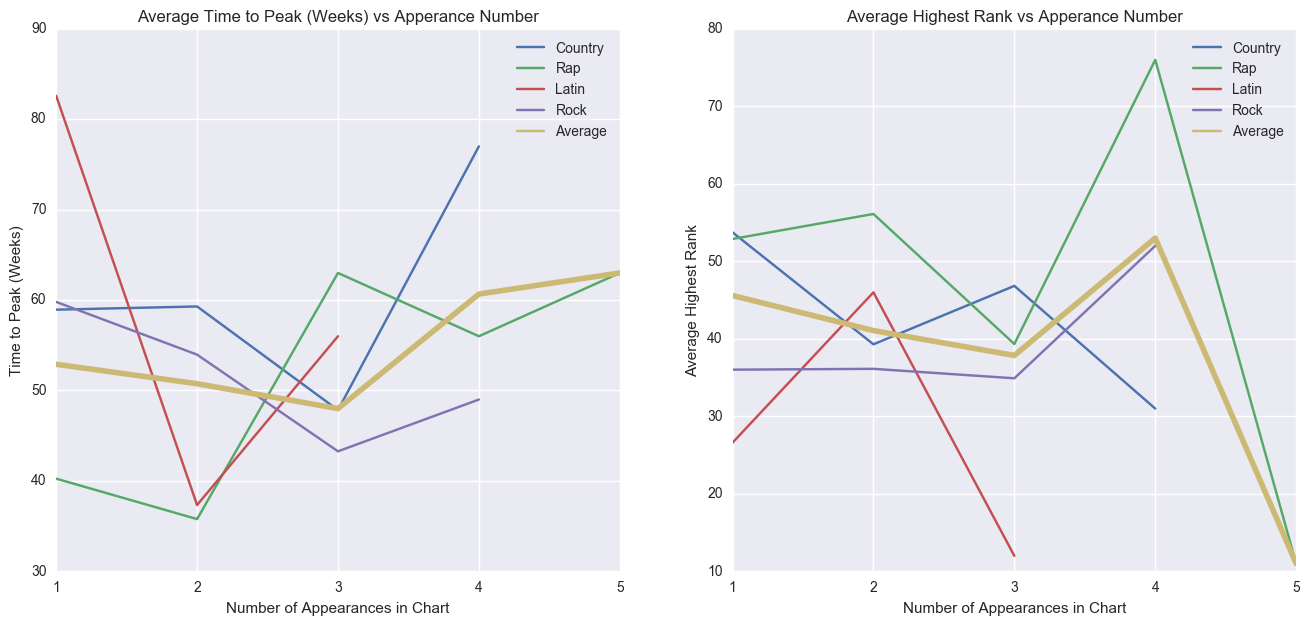

In [31]:
#Average time to peak for each of the Genres and the average are plotted on the same plot below.
fig6=plt.figure(figsize=(16,7))
ax8=fig6.add_subplot(121)
Country.plot(label=Country,ax=ax8)
ax9=Rap.plot(ax=ax8)
ax10=Latin.plot(ax=ax9)
ax11=Rock.plot(ax=ax10)
ax12=Time_to_Pk_Avg_Df.plot(xticks=range(1,6),ax=ax11,)
ax12.lines[-1].set_linewidth(4)
ax12.set_ylabel('Time to Peak (Weeks)')
ax12.set_xlabel('Number of Appearances in Chart')
fig6.savefig('AppChrt.png')
ax12.set_title('Average Time to Peak (Weeks) vs Apperance Number')

#Average Highest rank for each of the Genres and the average are plotted on the same plot below.
ax14=fig6.add_subplot(122)
CountryHR.plot(label=Country,ax=ax14)
ax15=RapHR.plot(ax=ax14)
ax16=LatinHR.plot(ax=ax15)
ax17=RockHR.plot(ax=ax16)
ax18=HR_Avg_Df.plot(xticks=range(1,6),ax=ax17,)
ax18.lines[-1].set_linewidth(4)
ax18.set_ylabel('Average Highest Rank')
ax18.set_xlabel('Number of Appearances in Chart')
ax18.set_title('Average Highest Rank vs Apperance Number')
fig6.savefig('AppChrt.png')


<img src="Rank_by_Week.png">